# **Determining the Best Advertising Platform for Conversions**

## **Business Problem**

As a marketing agency, our main goal is to maximize the return on investment (ROI) for our clients' advertising campaigns. We ran two ad campaigns: one on Facebook and another on AdWords. We need to find out which platform performs better in terms of clicks, conversions, and cost-effectiveness. By determining the more effective platform, we can use our resources more wisely and improve our advertising strategies to achieve better results for our clients.

## **Dataset Description**

This dataset contains information that compares the performance of two distinct advertising campaigns conducted during the year 2019. It specifically focuses on a Facebook advertising campaign and a Google Ads (AdWords) campaign. Each day of 2019 corresponds to a unique entry in the dataset, resulting in a total of 365 records for analysis. The dataset provides several performance metrics for each campaign, offering insights into their effectiveness and efficiency over time.

### **Key Features**

#### **Date:**
- The specific date for each entry, covering the period from January 1st, 2019, to December 31st, 2019.

#### **Facebook Ad Campaign Data:**
- **Facebook Ad Campaign**: Name of the specific Facebook ad campaign (e.g., `FB_Jan19`).
- **Facebook Ad Views**: Number of times the Facebook ad was viewed.
- **Facebook Ad Clicks**: Number of clicks the Facebook ad received.
- **Facebook Ad Conversions**: Number of successful conversions (e.g., sign-ups or purchases) from the ad clicks.
- **Cost per Facebook Ad**: Total cost spent on the Facebook ads for the day.
- **Facebook Click-Through Rate (Clicks / View)**: Percentage of views that resulted in clicks, calculated as `[(Clicks / Views) * 100]`.
- **Facebook Conversion Rate (Conversions / Clicks)**: Percentage of clicks that resulted in conversions, calculated as `[(Conversions / Clicks) * 100]`.
- **Facebook Cost per Click (Ad Cost / Clicks)**: Average cost for each click on the Facebook ad, calculated as `(Ad Cost / Clicks)`.

#### **AdWords Ad Campaign Data:**
- **AdWords Ad Campaign**: Name of the specific AdWords ad campaign (e.g., `AW_Jan19`).
- **AdWords Ad Views**: Number of times the AdWords ad was viewed.
- **AdWords Ad Clicks**: Number of clicks the AdWords ad received.
- **AdWords Ad Conversions**: Number of successful conversions from the ad clicks.
- **Cost per AdWords Ad**: Total cost spent on the AdWords ads for the day.
- **AdWords Click-Through Rate (Clicks / View)**: Percentage of views that resulted in clicks, calculated as `[(Clicks / Views) * 100]`.
- **AdWords Conversion Rate (Conversions / Clicks)**: Percentage of clicks that resulted in conversions, calculated as `[(Conversions / Clicks) * 100]`.
- **AdWords Cost per Click (Ad Cost / Clicks)**: Average cost for each click on the AdWords ad, calculated as `(Ad Cost / Clicks)`.

## **Research Question**



Which ad platform is more effective in terms of conversions, clicks, and overall cost-effectiveness?

### Importing Libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint 
import warnings
warnings.filterwarnings('ignore')

### Loading and Exploring the Dataset


In [72]:
# Loading the dataset
df = pd.read_csv('marketing_campaign.csv')

In [73]:
# Data overview
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [74]:
# Rows and columns count of the dataset
df.shape

(365, 17)

In [75]:
# Datatypes of the columns
df.dtypes

Date                                               object
Facebook Ad Campaign                               object
Facebook Ad Views                                   int64
Facebook Ad Clicks                                  int64
Facebook Ad Conversions                             int64
Cost per Facebook Ad                               object
Facebook Click-Through Rate (Clicks / View)        object
Facebook Conversion Rate (Conversions / Clicks)    object
Facebook Cost per Click (Ad Cost / Clicks)         object
AdWords Ad Campaign                                object
AdWords Ad Views                                    int64
AdWords Ad Clicks                                   int64
AdWords Ad Conversions                              int64
Cost per AdWords Ad                                object
AdWords Click-Through Rate (Clicks / View)         object
AdWords Conversion Rate (Conversions / Click)      object
AdWords Cost per Click (Ad Cost / Clicks)          object
dtype: object

In [76]:
# Converting date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [77]:
# Descriptive stats of the campaigns
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


### Comparing Campaigns Performance

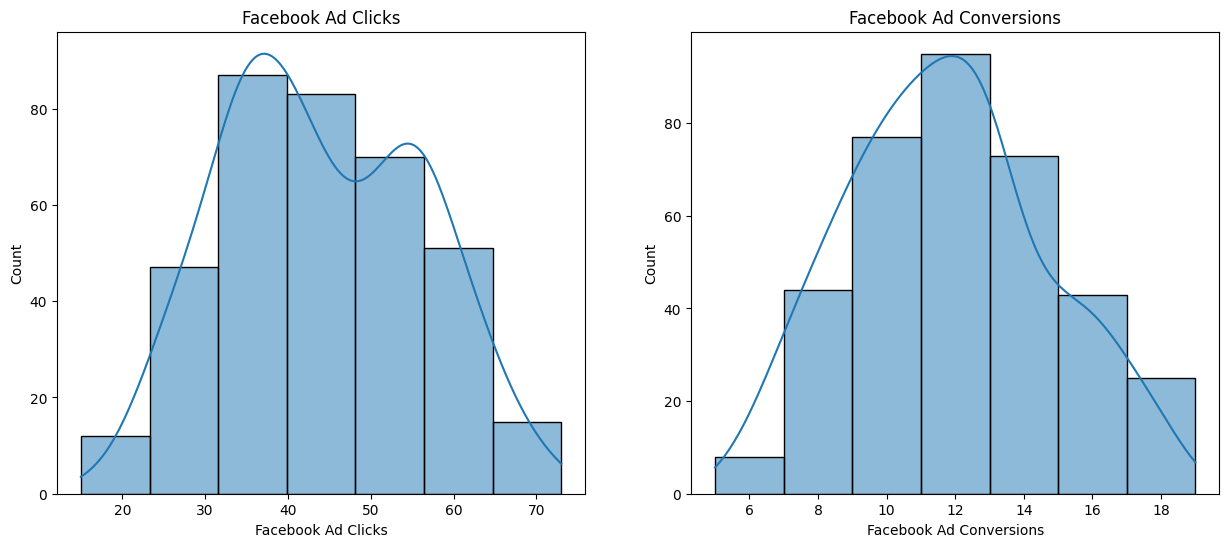

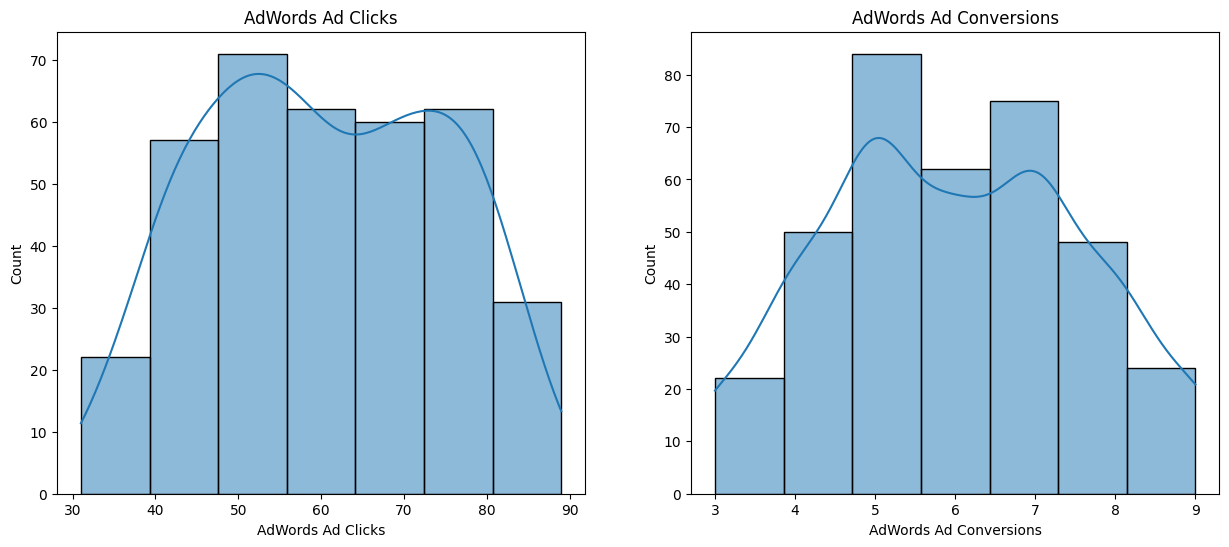

In [78]:
# Distribution of the clicks and conversions 
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['Facebook Ad Clicks'], bins = 7, edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['Facebook Ad Conversions'], bins = 7, edgecolor = 'k', kde = True)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('AdWords Ad Clicks')
sns.histplot(df['AdWords Ad Clicks'], bins = 7, edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title('AdWords Ad Conversions')
sns.histplot(df['AdWords Ad Conversions'], bins = 7, edgecolor = 'k', kde = True)
plt.show()

All the histograms show a fairly balanced shape. This balanced shape indicates that the clicks and conversions are distributed evenly. In other words, there aren’t many clicks or conversions that are unusually high or low.

### **How frequently do we observe days with high numbers of conversions compared to days with low numbers of conversions?**

In [79]:
df['Facebook Ad Conversions']

0       8
1      12
2       8
3       9
4       7
       ..
360    13
361    18
362    13
363     8
364    17
Name: Facebook Ad Conversions, Length: 365, dtype: int64

In [80]:
df['AdWords Ad Conversions']

0      5
1      6
2      4
3      5
4      7
      ..
360    9
361    6
362    6
363    6
364    6
Name: AdWords Ad Conversions, Length: 365, dtype: int64

In [81]:
# Creating function to calculate the category for the conversions
def create_conversion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('less than 6')
        elif 6 <= conversion < 11:
            category.append('6 - 10')
        elif 11 <= conversion < 16:
            category.append('10 - 15')
        else:
            category.append('more than 15')
    return category

# applying function of different campaign's conversions
df['Facebook Conversion Category'] = create_conversion_category('Facebook Ad Conversions')
df['AdWords Conversion Category'] = create_conversion_category('AdWords Ad Conversions')

In [82]:
df[['Facebook Ad Conversions','Facebook Conversion Category','AdWords Ad Conversions','AdWords Conversion Category']].head()

,Facebook Ad Conversions,Facebook Conversion Category,AdWords Ad Conversions,AdWords Conversion Category
0,8,6 - 10,5,less than 6
1,12,10 - 15,6,6 - 10
2,8,6 - 10,4,less than 6
3,9,6 - 10,5,less than 6
4,7,6 - 10,7,6 - 10


In [83]:
df['Facebook Conversion Category'].value_counts()

Facebook Conversion Category
10 - 15         189
6 - 10          128
more than 15     47
less than 6       1
Name: count, dtype: int64

In [84]:
facebook = pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index().rename(columns = {'Facebook Conversion Category':'Category'})
facebook

,Category,count
0,10 - 15,189
1,6 - 10,128
2,more than 15,47
3,less than 6,1


In [85]:
df['AdWords Conversion Category'].value_counts()

AdWords Conversion Category
6 - 10         209
less than 6    156
Name: count, dtype: int64

In [86]:
adwords = pd.DataFrame(df['AdWords Conversion Category'].value_counts()).reset_index().rename(columns = {'AdWords Conversion Category':'Category'})
adwords

,Category,count
0,6 - 10,209
1,less than 6,156


In [87]:
category_df = pd.merge(facebook, adwords, on = 'Category', how = 'outer').fillna(0)
category_df

,Category,count_x,count_y
0,10 - 15,189,0.0
1,6 - 10,128,209.0
2,less than 6,1,156.0
3,more than 15,47,0.0


In [88]:
category_df = category_df.iloc[[3,1,0,2]]
category_df

,Category,count_x,count_y
3,more than 15,47,0.0
1,6 - 10,128,209.0
0,10 - 15,189,0.0
2,less than 6,1,156.0


In [89]:
X_axis = np.arange(len(category_df)) 
X_axis

array([0, 1, 2, 3])

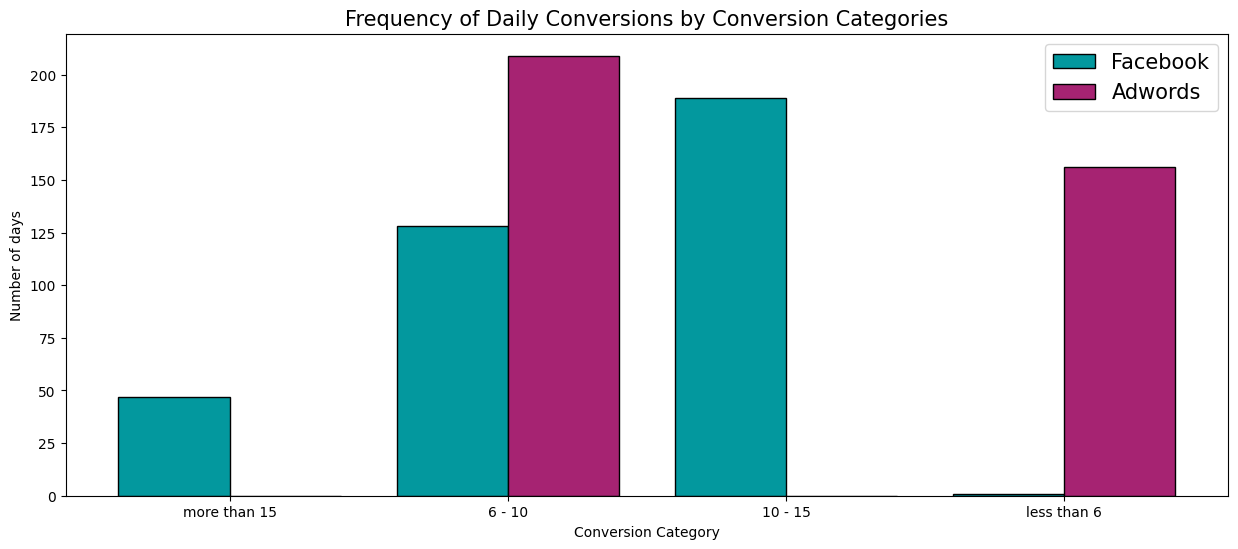

In [90]:
X_axis = np.arange(len(category_df)) 
plt.figure(figsize = (15,6))
plt.bar(X_axis - 0.2, category_df['count_x'], 0.4, label = 'Facebook', color = '#03989E', linewidth = 1, edgecolor = 'k') 
plt.bar(X_axis + 0.2, category_df['count_y'], 0.4, label = 'Adwords', color = '#A62372', linewidth = 1, edgecolor = 'k') 
  
plt.xticks(X_axis, category_df['Category']) 
plt.xlabel("Conversion Category") 
plt.ylabel("Number of days") 
plt.title("Frequency of Daily Conversions by Conversion Categories", fontsize = 15) 
plt.legend(fontsize = 15) 
plt.show() 

- The data shows that Facebook had more days with higher conversions compared to AdWords, which mostly had low conversions (less than 6) or moderate ones (6-10).
- There's a noticeable difference in the number of high-conversion days between the two campaigns.
- Since AdWords had no days with conversions between 10-15 or more than 15, it might be worth reviewing any strategy changes or external factors that impacted these numbers.

### **Do more clicks on the ad really lead to more sales?**

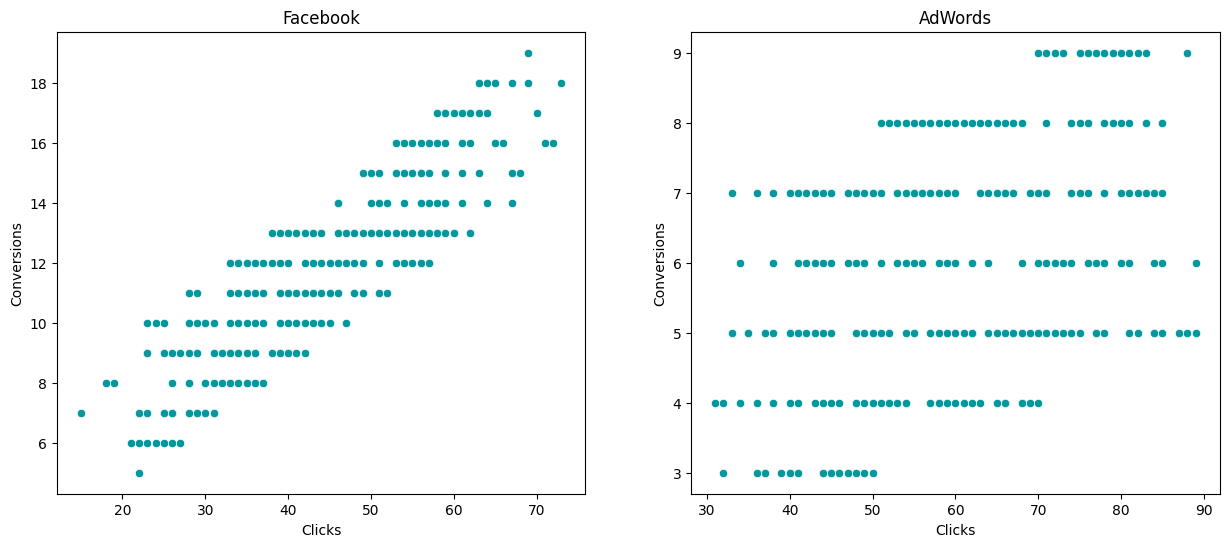

In [91]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot(x = df['Facebook Ad Clicks'],y = df['Facebook Ad Conversions'], color = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.subplot(1,2,2)
plt.title('AdWords')
sns.scatterplot(x = df['AdWords Ad Clicks'],y = df['AdWords Ad Conversions'], color = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.show()

In [92]:
facebook_corr = df[['Facebook Ad Conversions','Facebook Ad Clicks']].corr()
facebook_corr

,Facebook Ad Conversions,Facebook Ad Clicks
Facebook Ad Conversions,1.000000,0.873775
Facebook Ad Clicks,0.873775,1.000000


In [93]:
adwords_corr = df[['AdWords Ad Conversions','AdWords Ad Clicks']].corr()
adwords_corr

,AdWords Ad Conversions,AdWords Ad Clicks
AdWords Ad Conversions,1.000000,0.447993
AdWords Ad Clicks,0.447993,1.000000


In [94]:
print('Correlation Coeff \n-----------------')
print('Facebook :',round(facebook_corr.values[0,1],2))
print('AdWords : ',round(adwords_corr.values[0,1],2))

Correlation Coeff 
-----------------
Facebook : 0.87
AdWords :  0.45


- A correlation coefficient of 0.87 shows a strong positive link between Facebook ad clicks and sales. This means that as clicks on Facebook ads go up, sales generally go up too.
- This strong link suggests that Facebook ads are very effective at driving sales, with a large part of the sales increase being related to the increase in clicks.
- The strong connection between Facebook ad clicks and sales indicates that investing more in Facebook ads or improving their performance could boost sales even more.
- A correlation coefficient of 0.45 shows a moderate positive link between AdWords ad clicks and sales. Though there is still a positive connection, it's not as strong as with Facebook ads.
- The moderate connection between AdWords clicks and sales suggests that while AdWords ads help drive sales, their success might depend on other factors. More analysis is needed to figure out what these factors are and how to improve AdWords campaigns.

## **A/B Testing**

**Test Objective:** Determine whether advertising on Facebook results in a higher number of conversions compared to AdWords.

**Null Hypothesis (H0):** There is no important difference in how many conversions Facebook ads (Group A) get compared to AdWords ads (Group B). In fact, the conversions from AdWords could be equal to or even greater than those from Facebook.

H0: µ_A ≤ µ_B

**Alternative Hypothesis (H1):** Facebook ads (Group A) generate more conversions than AdWords ads (Group B).

H1: µ_A > µ_B

In [95]:
print(df['Facebook Ad Conversions'].mean())

11.742465753424657


In [96]:
print(df['AdWords Ad Conversions'].mean())

5.980821917808219


In [97]:
# Mean conversion rates for both groups (Facebook vs AdWords)
print('Mean Conversion \n---------------')
print('Facebook (Group A):', round(df['Facebook Ad Conversions'].mean(),2))
print('AdWords (Group B):', round(df['AdWords Ad Conversions'].mean(),2))

# Performing the t-test to compare the two groups
t_stats, p_value = st.ttest_ind(a = df['Facebook Ad Conversions'], b = df['AdWords Ad Conversions'], equal_var = False)
print('\nT statistic', t_stats, '\np-value', p_value)

# Comparing the p-value with the significance level (alpha = 0.05)
if p_value < 0.05:
    print("\nThe p-value is less than 0.05, so we reject the null hypothesis.")
else:
    print("\nThe p-value is greater than 0.05, so we fail to reject the null hypothesis.")

Mean Conversion 
---------------
Facebook (Group A): 11.74
AdWords (Group B): 5.98

T statistic 32.88402060758184 
p-value 9.348918164530465e-134

The p-value is less than 0.05, so we reject the null hypothesis.


- The average number of conversions from Facebook ads (11.74) is much higher than the average from AdWords ads (5.98). This means Facebook ads are generally better at getting people to take action.
- The T statistic (32.88) shows how different the average conversions are between the two groups compared to how much the data varies. A higher T statistic indicates a strong, significant difference between groups, boosting confidence in decisions, while a lower T statistic suggests a less meaningful difference, warranting caution.
- The p-value (9.35e-134) is very small, which means there’s strong evidence that the two groups really do differ and we should reject the idea that there’s no difference (the null hypothesis).
- These results support the idea that Facebook ads lead to more conversions than AdWords ads.
- Based on this data, Facebook advertising seems to work better for getting people to convert compared to AdWords.
- Because of the big difference in how well Facebook and AdWords ads perform, it might be a good idea to spend more on Facebook ads. This could mean increasing the budget, targeting more specific audiences, or trying new types of ads to make the most of Facebook’s effectiveness.

## **Regression Analysis**

### **What will happen when I do go with the Facebook Ad? How many facebook ad conversions can I expect given a certain number of facebook ad clicks?**

In [98]:
# independent variable
X = df[['Facebook Ad Clicks']]

# dependent variable
y = df[['Facebook Ad Conversions']]

# initializing and fitting Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X,y)
prediction = reg_model.predict(X)

# model evaluation
r2 = r2_score(y, prediction)*100
mse = mean_squared_error(y, prediction)
print('Accuracy (R2 Score):',round(r2,2),'%')
print('Mean Squared Error:', round(mse,2))

Accuracy (R2 Score): 76.35 %
Mean Squared Error: 2.02


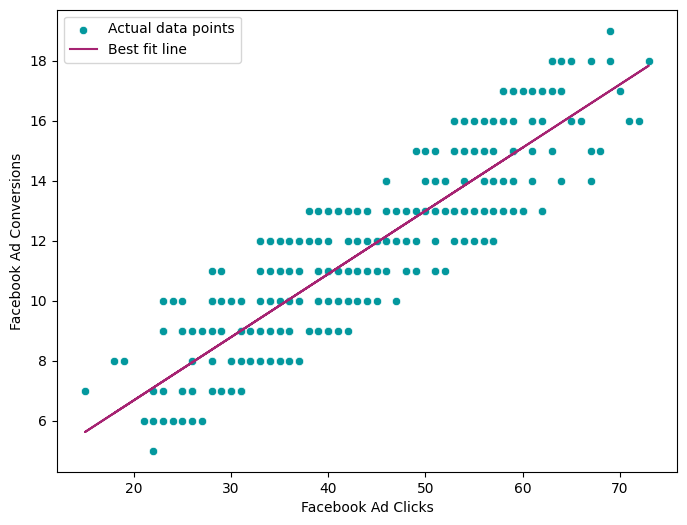

In [99]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Facebook Ad Clicks'],y = df['Facebook Ad Conversions'], color = '#03989E', label = 'Actual data points')
plt.plot(df['Facebook Ad Clicks'], prediction, color = '#A62372', label = 'Best fit line')
plt.legend()
plt.show()

In [100]:
print(f'For {50} Clicks, Expected Conversion : {round(reg_model.predict([[50]])[0][0],2)}')
print(f'For {80} Clicks, Expected Conversion : {round(reg_model.predict([[80]])[0][0],2)}')

For 50 Clicks, Expected Conversion : 13.0
For 80 Clicks, Expected Conversion : 19.31


- The model has a good ability to predict outcomes, with an R² score of 76.35%. This indicates it can effectively estimate the number of conversions from Facebook ad clicks.
- The findings from this model can assist businesses in making smarter choices regarding resource allocation, budget planning, and enhancing their ad campaigns.
- For instance, knowing how many conversions to expect from a specific number of clicks can help businesses set achievable goals, manage their ad spending, and assess the return on investment (ROI) for their Facebook ads.

## **Analyzing Facebook Campaign metrics over time**

In [101]:
# Cleaning data ( removing unwanted symbols from the columns and converting them to numerical columns)
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(lambda x: float(x[:-1]))
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(lambda x: float(x[:-1]))
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(lambda x: float(x[1:]))
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(lambda x: float(x[1:]))

In [102]:
# Filtering for facebook campaign
df = df[['Date','Facebook Ad Views',
       'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
       'Facebook Click-Through Rate (Clicks / View)',
       'Facebook Conversion Rate (Conversions / Clicks)',
       'Facebook Cost per Click (Ad Cost / Clicks)']]

In [103]:
df.head()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks)
0,2019-01-01,2116,18,8,126.0,0.83,42.73,7.14
1,2019-01-02,3106,36,12,104.0,1.15,34.04,2.91
2,2019-01-03,3105,26,8,102.0,0.84,31.45,3.89
3,2019-01-04,1107,27,9,71.0,2.45,34.76,2.62
4,2019-01-05,1317,15,7,78.0,1.10,47.59,5.38


### **At what times of the month or days of the week do we observe the conversions?**

In [106]:
# Extracting month and week day from the date column
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.weekday

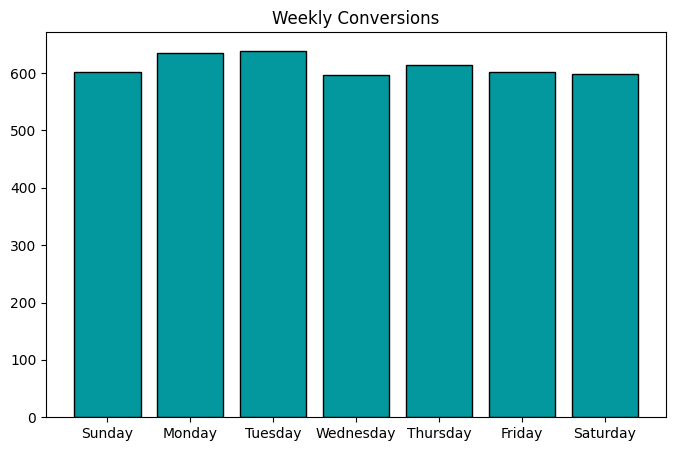

In [107]:
plt.figure(figsize=(8,5))
plt.title('Weekly Conversions')
weekly_conversion = df.groupby('week')[['Facebook Ad Conversions']].sum()
week_names= ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.bar(week_names, weekly_conversion['Facebook Ad Conversions'], color = '#03989E', edgecolor = 'k')
plt.show()

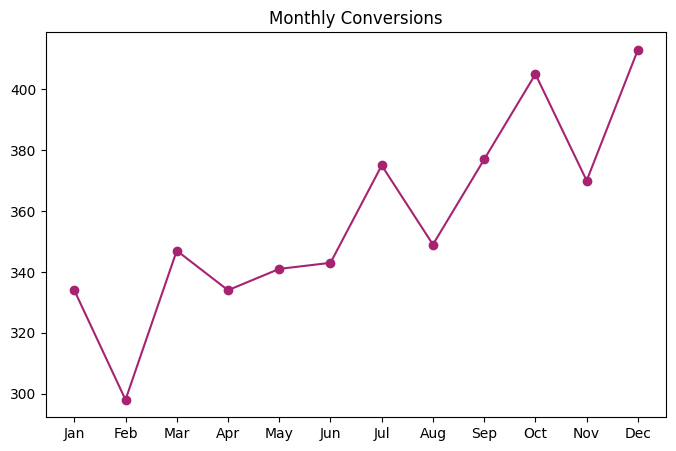

In [108]:
plt.figure(figsize=(8,5))
plt.title('Monthly Conversions')
monthly_conversion = df.groupby('month')[['Facebook Ad Conversions']].sum()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_names, monthly_conversion['Facebook Ad Conversions'],'-o', color = '#A62372')
plt.show()

- Throughout the week, the number of conversions stays fairly steady, showing that user engagement is consistent. However, Mondays and Tuesdays have the highest conversion rates, suggesting that people are more responsive to marketing efforts at the start of the week.
- Looking at the monthly conversion trends, there is a general increase over time. However, some months like February, April, May, June, August, and November show lower conversion rates than the months before and after them. These drops in conversions could be due to seasonal changes, shifts in consumer behavior, or adjustments in marketing strategies.

### **How does the Cost Per Conversion (CPC) trend over time?**

Cost Per Conversion (CPC): This metric is used to evaluate the cost effectiveness and profitability of an online advertising campaign. This metric helps marketers understand how much they are spending to obtain each conversion, allowing them to optimize their spending and targeting strategies effectively.

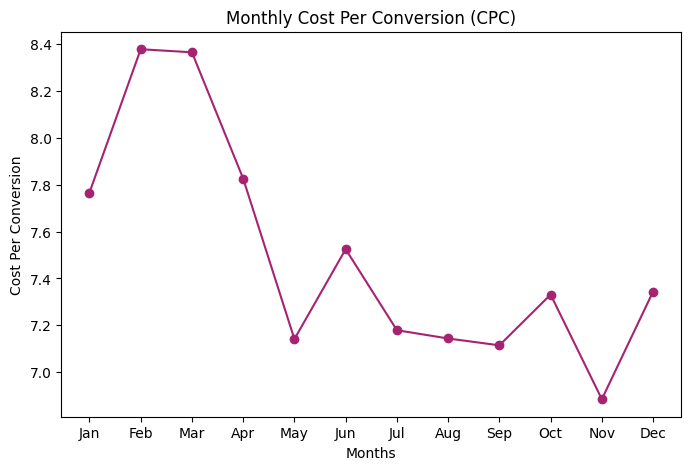

In [110]:
plt.figure(figsize=(8,5))
plt.title('Monthly Cost Per Conversion (CPC)')

# Grouping data by month and calculating cost per conversion
monthly_df = df.groupby('month')[['Facebook Ad Conversions','Cost per Facebook Ad']].sum()
monthly_df['Cost per Conversion'] = monthly_df['Cost per Facebook Ad'] / monthly_df['Facebook Ad Conversions']

# Plotting the cost per conversion
plt.plot(month_names, monthly_df['Cost per Conversion'], '-o', color = '#A62372')

# Adding labels to the axes
plt.xlabel('Months')               # Label for x-axis
plt.ylabel('Cost Per Conversion')  # Label for y-axis
plt.show()

- The CPC (Cost Per Conversion) changes over the year but stays mostly in a steady range.
- May and November have the lowest CPC, which means ads were likely cheaper or more effective during these months.
- February has the highest CPC, indicating that advertising costs were higher this month compared to others.
- Lower CPC in months like May and November may show that ads worked better or the market was more favorable.
- It's a good idea to spend more on ads in months with lower CPC, like May and November, to get the best return on investment (ROI).

### **Is there a long-term equilibrium relationship between advertising spend and conversion rates that suggests a stable, proportional impact of budget changes on conversions over time?**

In time series analysis, the cointegration test is used to determine if two or more variables share a long-term equilibrium relationship, even though they may individually be non-stationary. In this context, we are analyzing the relationship between advertising spend (cost per Facebook ad) and conversion rates over time.

The null hypothesis in the cointegration test states that there is no long-term equilibrium relationship between the two variables. If the p-value from the test is smaller than the significance level (e.g., 0.05), we reject the null hypothesis, indicating the existence of a stable, long-term relationship.

This can help businesses understand whether changes in advertising spend will lead to proportional changes in conversion rates over time, allowing for better budget optimization and long-term strategy planning.

In [ ]:
score, p_value, _ = coint(df['Cost per Facebook Ad'], df['Facebook Ad Conversions'])
print('Cointegration test score:', score)
print('P-value:', p_value)
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

- The cointegration test score of -14.7554 indicates a strong long-term relationship between advertising spend and conversions. A negative score suggests that this relationship is stable and inversely correlated, while a positive score would indicate a stable relationship in the same direction, where increased spending consistently leads to increased conversions.

- Since the p-value is much smaller than the significance level, we reject the null hypothesis. This means there is a long-term connection between how much is spent on advertising and the number of conversions.

- Companies can use this information to improve their advertising strategies. By focusing on campaigns that provide a good return on investment (ROI) and adjusting their spending based on results, they can achieve more conversions while keeping costs down.